# Imports and libraries

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [46]:
globals().keys()


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'kagglehub', 'os', 'pd', 'np', 'plt', 'sns', 'StandardScaler', 'PCA', 'KMeans', 'AgglomerativeClustering', 'DBSCAN', 'GaussianMixture', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score', '_i2', 'path', 'activity_file', 'df', '_2', '_i3', '_3', '_i4', '_i5', '_5', '_i6', 'df_clean', '_6', '_i7', '_7', '_i8', '_8', '_i9', '_i10', 'activity_features', '_i11', '_i12', '_i13', 'corr', '_i14', 'features', 'df_log', '_i15', 'scaler', 'X_scaled', '_i16', 'pca', 'X_pca', 'explained_variance', '_i17', '_i18', '_i19', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', 'inertia', 'sil_scores', 'k', 'km', '_i27', 'k_values', 'silhouette_scores', 'kmeans', '_i28', '_i29', '_i30', 'X_pca_full', 'cumulative_variance', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36'

# Dataset

In [2]:
path = kagglehub.dataset_download("arashnic/fitbit")
print(path)

os.listdir(path)

activity_file = os.path.join(
    path,
    "mturkfitbit_export_3.12.16-4.11.16",
    "Fitabase Data 3.12.16-4.11.16",
    "dailyActivity_merged.csv"
)

df = pd.read_csv(activity_file)
df.head()

100%|██████████| 43.3M/43.3M [00:00<00:00, 116MB/s]

Extracting files...


/root/.cache/kagglehub/datasets/arashnic/fitbit/versions/2


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


# Data Understanding

In [3]:
df.shape

(457, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [5]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


In [8]:
df.isnull().sum()

,0
Id,0
ActivityDate,0
TotalSteps,0
TotalDistance,0
TrackerDistance,0
LoggedActivitiesDistance,0
VeryActiveDistance,0
ModeratelyActiveDistance,0
LightActiveDistance,0
SedentaryActiveDistance,0


**Removing non-behavioral columns**

In [6]:
df_clean = df.drop(columns=["Id", "ActivityDate"])
df_clean.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


# EDA

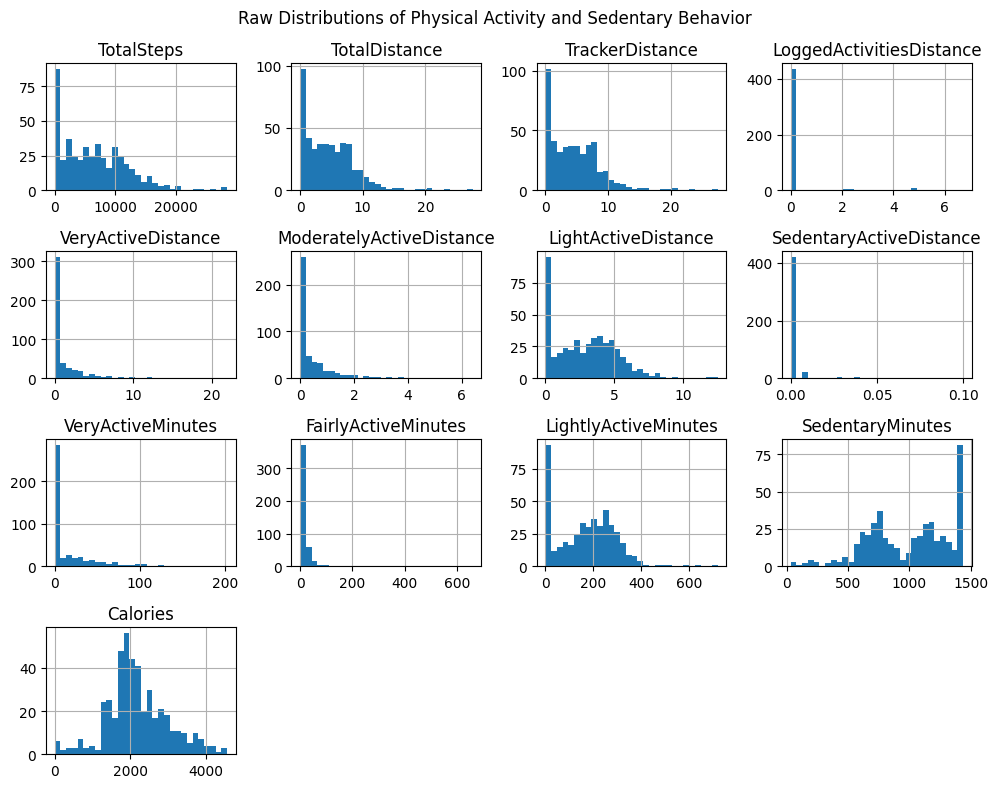

In [11]:
# Select numeric activity features (exclude Id and date)
activity_features = df.drop(columns=["Id", "ActivityDate"])

# Plot histograms
activity_features.hist(figsize=(10,8), bins=30)
plt.suptitle("Raw Distributions of Physical Activity and Sedentary Behavior")
plt.tight_layout()
plt.show()


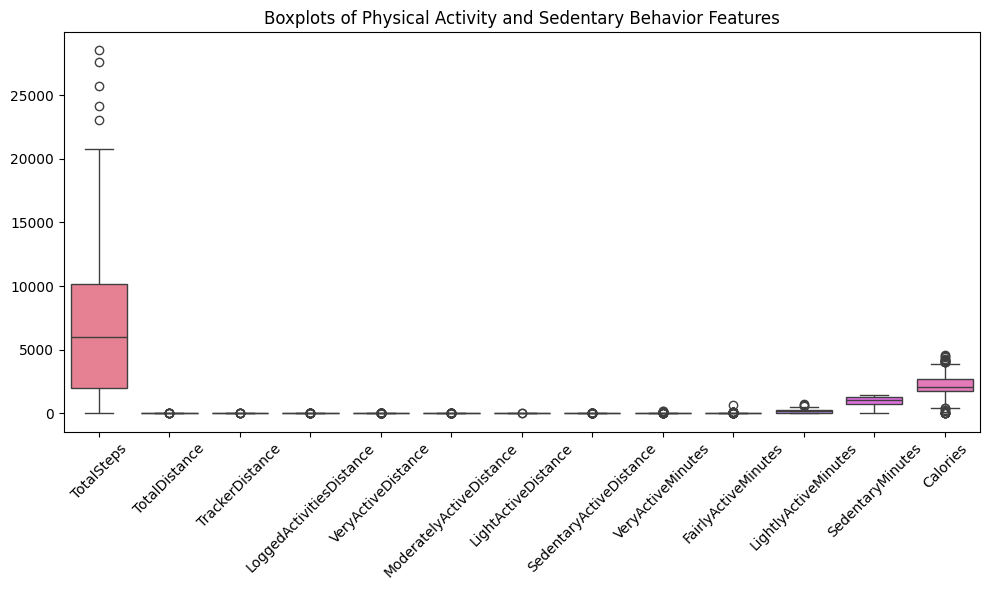

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(data=activity_features)
plt.xticks(rotation=45)
plt.title("Boxplots of Physical Activity and Sedentary Behavior Features")
plt.tight_layout()
plt.show()

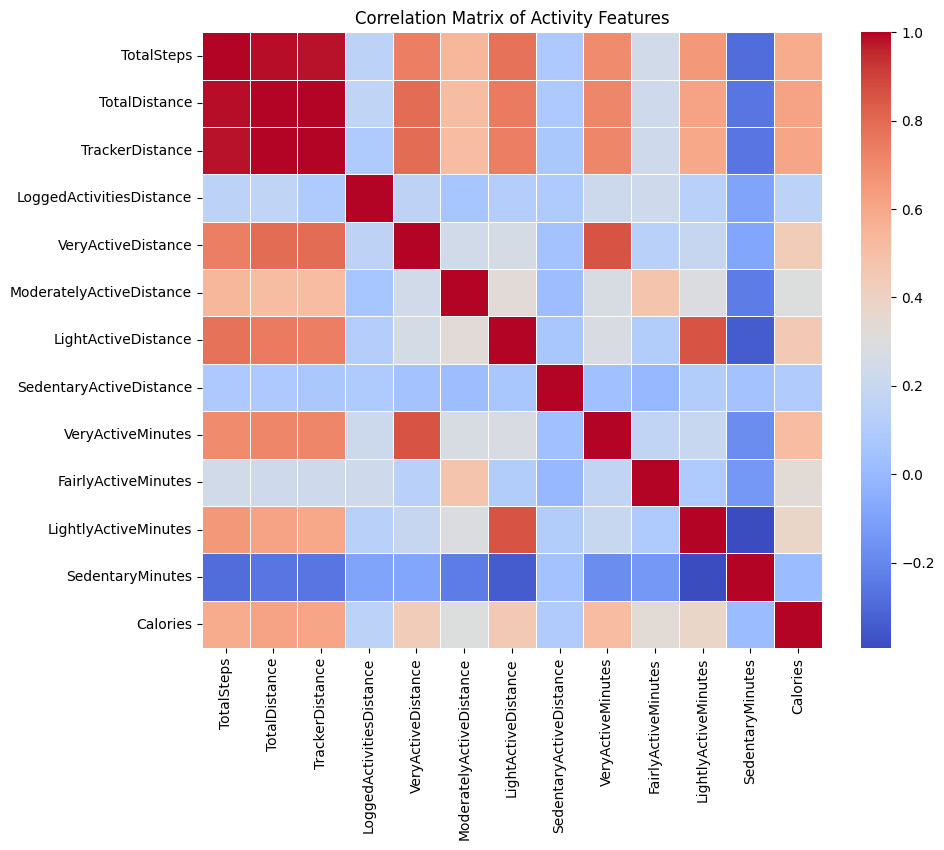

In [36]:
plt.figure(figsize=(10,8))
corr = activity_features.corr()

sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=False,
    linewidths=0.5
)

plt.title("Correlation Matrix of Activity Features")
plt.show()

# Feature Selection and outlier handling

In [53]:
features = [
    'TotalSteps',
    'VeryActiveMinutes',
    'FairlyActiveMinutes',
    'LightlyActiveMinutes',
    'SedentaryMinutes',
    'Calories'
]

df_log = df[features].apply(lambda x: np.log1p(x))

# Normalization

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_log)

X_scaled = pd.DataFrame(X_scaled, columns=features)

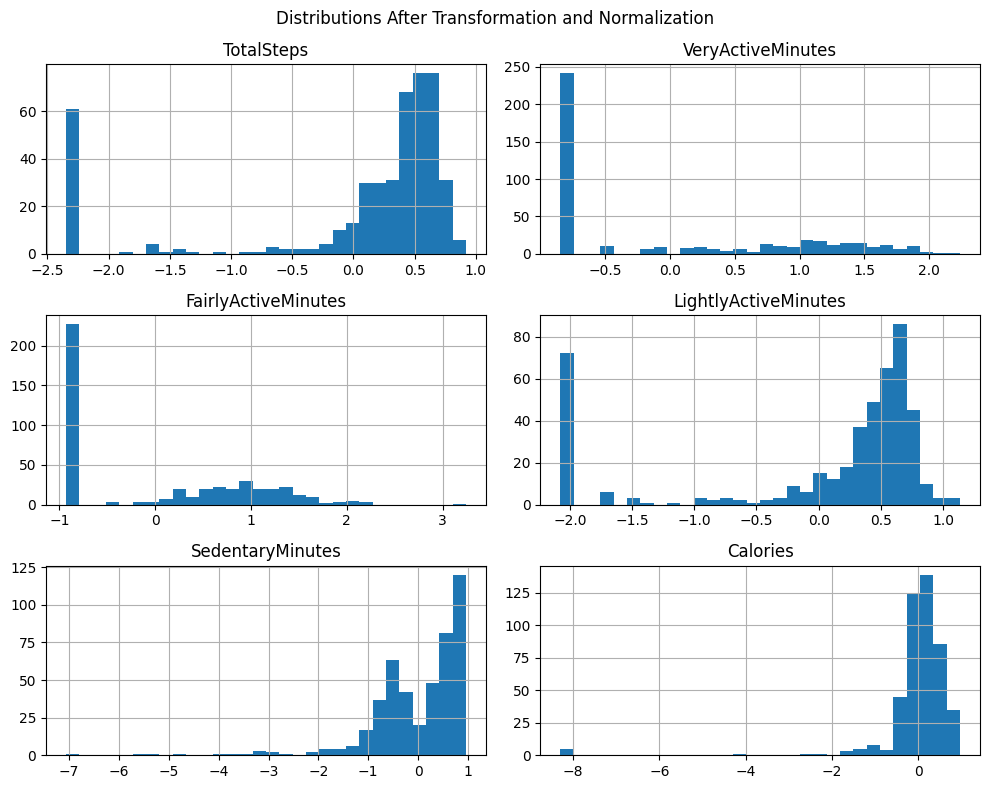

In [55]:
X_scaled.hist(figsize=(10,8), bins=30)
plt.suptitle("Distributions After Transformation and Normalization")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2193575692.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_scaled.values, labels=X_scaled.columns)


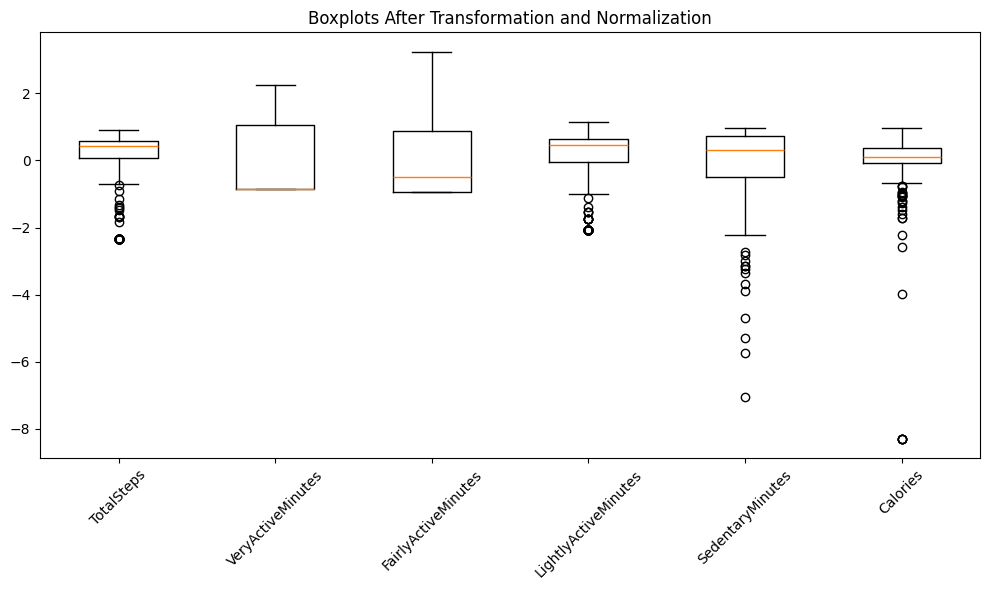

In [56]:
plt.figure(figsize=(10,6))
plt.boxplot(X_scaled.values, labels=X_scaled.columns)
plt.xticks(rotation=45)
plt.title("Boxplots After Transformation and Normalization")
plt.tight_layout()
plt.show()

# PCA

Explained variance ratio per component:
[0.50876261 0.18430319 0.15393677 0.09877376 0.03923785 0.01498582]

Cumulative explained variance:
[0.50876261 0.6930658  0.84700258 0.94577634 0.98501418 1.        ]


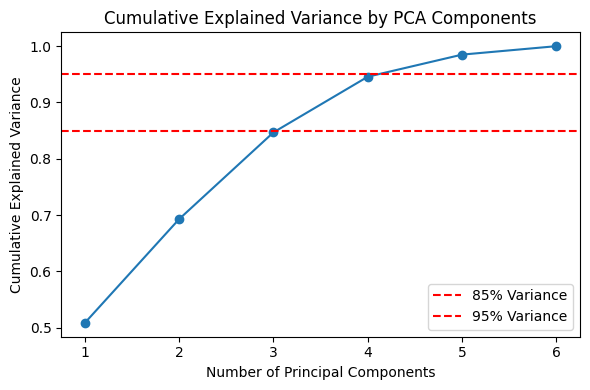

In [62]:
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
X_pca = X_pca_full[:, :3]

print("Explained variance ratio per component:")
print(explained_variance)

print("\nCumulative explained variance:")
print(cumulative_variance)

# Plot cumulative explained variance
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cumulative_variance)+1),
         cumulative_variance,
         marker='o')

plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by PCA Components")
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.tight_layout()
plt.show()

# Finding Optimal K value

In [66]:
k_values = list(range(2,8))   # 2 to 7

inertia = []
silhouette_scores = []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    inertia.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, labels))

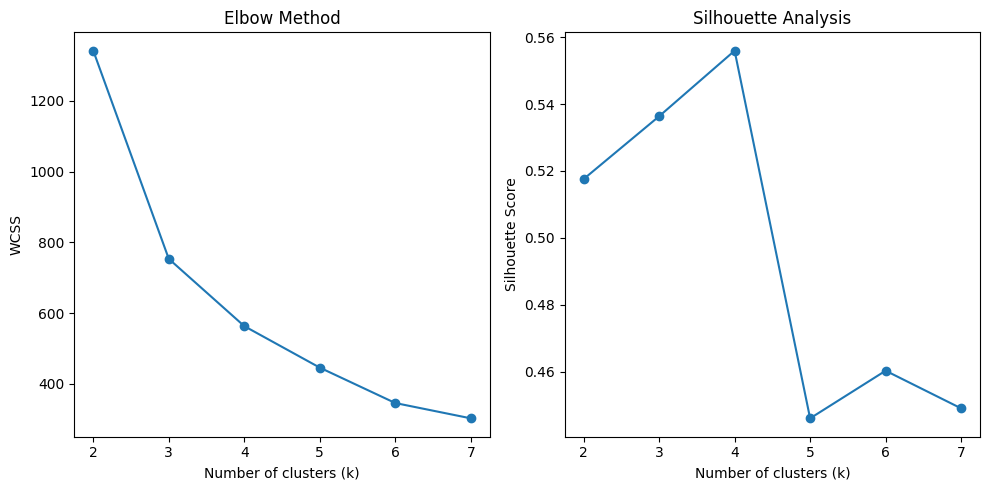

In [67]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")

plt.tight_layout()
plt.show()

# Clustering Algorithm Performance Evaluation

In [68]:
# --- KMeans (already selected k=3) ---
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# --- Hierarchical Clustering ---
hier = AgglomerativeClustering(n_clusters=3)
hier_labels = hier.fit_predict(X_pca)

# --- DBSCAN ---
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

# --- Gaussian Mixture Model ---
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

# --- Evaluation ---
models = {
    "K-Means": kmeans_labels,
    "Hierarchical": hier_labels,
    "DBSCAN": dbscan_labels,
    "GMM": gmm_labels
}

results = []

for name, labels in models.items():
    if len(set(labels)) > 1:
        results.append({
            "Model": name,
            "Silhouette Score": silhouette_score(X_pca, labels),
            "Calinski-Harabasz Index": calinski_harabasz_score(X_pca, labels),
            "Davies-Bouldin Index": davies_bouldin_score(X_pca, labels)
        })

comparison_table = pd.DataFrame(results)
comparison_table

,Model,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
0,K-Means,0.536331,472.508440,0.711939
1,Hierarchical,0.513566,394.225990,0.837745
2,DBSCAN,0.526760,327.612281,0.943257
3,GMM,0.521460,432.573918,0.730504


# Cluster Behavioral Profiles

In [70]:
# Attach cluster labels to normalized feature dataframe
profile_df = pd.DataFrame(X_scaled, columns=features)
profile_df["Cluster"] = kmeans_labels

# Compute cluster-wise means
cluster_profiles = profile_df.groupby("Cluster").mean()

cluster_profiles


,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Cluster,,,,,,
0,-2.140013,-0.763584,-0.872940,-2.015643,0.642457,-0.753156
1,0.584320,0.955947,0.948697,0.550279,-0.209752,0.300226
2,0.210414,-0.813324,-0.758465,0.198283,-0.022362,-0.038363


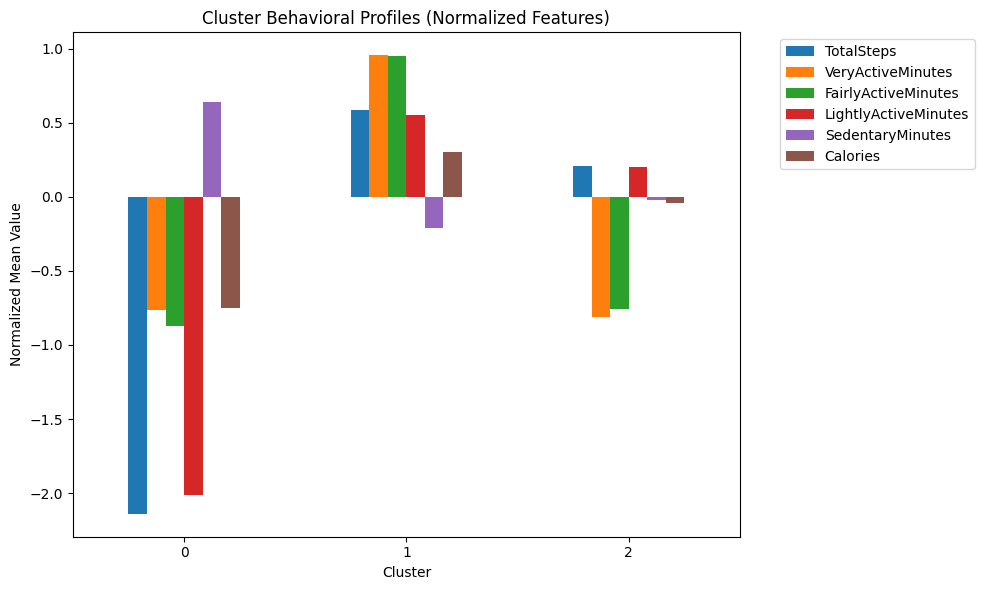

In [77]:
cluster_profiles.plot(kind="bar", figsize=(10,6))
plt.ylabel("Normalized Mean Value")
plt.title("Cluster Behavioral Profiles (Normalized Features)")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

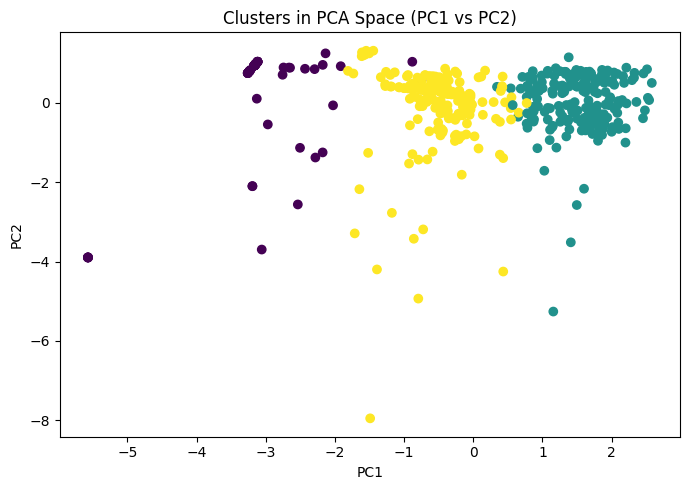

In [72]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters in PCA Space (PC1 vs PC2)")
plt.tight_layout()
plt.show()